In [1]:
# import Dependencies
import numpy as np
import pandas as pd

In [2]:
# import Libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# read beers dataset into dataframe
beers_csv = "/Users/whodat_saints/Desktop/beers.csv"
beers = pd.read_csv(beers_csv, low_memory = "False")

In [72]:
# View tail
beers.tail(5)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0
2409,2409,0.052,NaN,84,Rail Yard Ale (2009),American Amber / Red Ale,424,12.0


In [51]:
# Keep only variables of interest

df=beers[['abv','ibu','style','ounces']]

In [52]:
# Take out NA

final=df.groupby('style').filter(lambda x: len(x) > 10)
df=final.dropna()

In [53]:
df.head(5)

,abv,ibu,style,ounces
14,0.061,60.0,American Pale Ale (APA),12.0
22,0.079,45.0,Winter Warmer,12.0
24,0.044,42.0,American Pale Ale (APA),12.0
25,0.049,17.0,Fruit / Vegetable Beer,12.0
26,0.049,17.0,Fruit / Vegetable Beer,12.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 14 to 2408
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   abv     1294 non-null   float64
 1   ibu     1294 non-null   float64
 2   style   1294 non-null   object 
 3   ounces  1294 non-null   float64
dtypes: float64(3), object(1)
memory usage: 50.5+ KB


In [55]:
df.describe()

,abv,ibu,ounces
count,1294.000000,1294.000000,1294.000000
mean,0.059760,43.623648,13.484467
std,0.013133,26.225445,2.256502
min,0.028000,4.000000,12.000000
25%,0.050000,21.000000,12.000000
50%,0.057000,36.000000,12.000000
75%,0.067750,65.000000,16.000000
max,0.120000,138.000000,32.000000


In [56]:
print(df.shape)

(1294, 4)


In [57]:
df['style'].unique()

array(['American Pale Ale (APA)', 'Winter Warmer',
       'Fruit / Vegetable Beer', 'American IPA',
       'American Double / Imperial IPA', 'American Black Ale',
       'Belgian Dark Ale', 'Berliner Weissbier', 'American Blonde Ale',
       'American Pale Wheat Ale', 'Kölsch', 'English Pale Ale',
       'American Amber / Red Lager', 'American Brown Ale',
       'German Pilsener', 'Pumpkin Ale', 'Belgian Pale Ale',
       'American Pilsner', 'Saison / Farmhouse Ale', 'English Brown Ale',
       'American Stout', 'Altbier', 'Oatmeal Stout', 'Cream Ale',
       'American Amber / Red Ale', 'Vienna Lager', 'American Porter',
       'Munich Helles Lager', 'Witbier', 'Märzen / Oktoberfest', 'Tripel',
       'Rye Beer', 'American Pale Lager', 'Hefeweizen',
       'English India Pale Ale (IPA)',
       'Extra Special / Strong Bitter (ESB)', 'American Strong Ale',
       'Czech Pilsener', 'American White IPA', 'Scotch Ale / Wee Heavy',
       'Irish Red Ale', 'American Adjunct Lager', 'Scottish

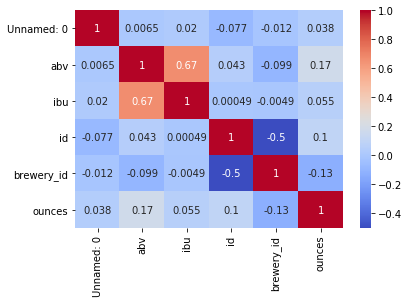

In [100]:
# Correlation Matrix 
sns.heatmap(beers.corr(), cmap='coolwarm', annot=True)
plt.savefig('/Users/whodat_saints/Desktop/beerCorr.png')

<Figure size 1440x720 with 0 Axes>

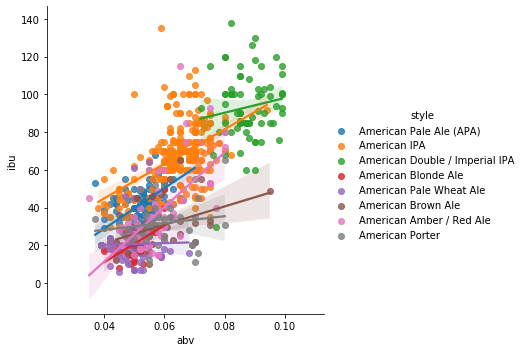

In [58]:
final1=df.groupby('style').filter(lambda x: len(x) > 30)
plt.figure(figsize=(20,10)) 
g = sns.lmplot(x='abv',y='ibu',data=final1, hue='style')

plt.show(g)

<Figure size 1080x1080 with 0 Axes>

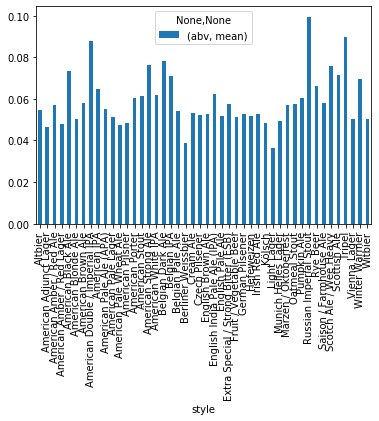

In [59]:
plt.figure(figsize=(15,15))
final2=df.groupby('style').agg({'abv':['mean']}).plot(kind='bar')
plt.show(final2)

# Standardising the dataset

In [60]:
# Scale data to be Guassian and distributed between 0-1 and
# Exclude style as it nonScalar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('style',axis=1))
scaled_features = scaler.transform(df.drop('style',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [75]:
# Split Data 80/20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['style'],
                                                    test_size=0.20)

# KNN 

In [93]:
# KNN Model Fit to train to data

from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    train_score = knn.score(X_train, y_train) 
    test_score = knn.score(X_test, y_test)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.842/0.371
k: 3, Train/Test Score: 0.589/0.386
k: 5, Train/Test Score: 0.524/0.398
k: 7, Train/Test Score: 0.492/0.405
k: 9, Train/Test Score: 0.471/0.402
k: 11, Train/Test Score: 0.474/0.398
k: 13, Train/Test Score: 0.461/0.398
k: 15, Train/Test Score: 0.451/0.398
k: 17, Train/Test Score: 0.455/0.402
k: 19, Train/Test Score: 0.452/0.359


In [94]:
# Confusion Matrix, and Classification Report

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred, output_dict=False))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
                                     precision    recall  f1-score   support

                            Altbier       0.00      0.00      0.00         2
             American Adjunct Lager       0.00      0.00      0.00         2
           American Amber / Red Ale       0.29      0.22      0.25        18
         American Amber / Red Lager       0.00      0.00      0.00         5
                 American Black Ale       0.00      0.00      0.00         4
                American Blonde Ale       0.07      0.30      0.12        10
                 American Brown Ale       0.00      0.00      0.00         6
     American Double / Imperial IPA       0.75      0.79      0.77        19
                       American IPA       0.56      0.88      0.69        51
            American Pale Ale (APA)       0.40      0.54      0.46        35
                American Pale La

/Users/whodat_saints/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Error Rate')

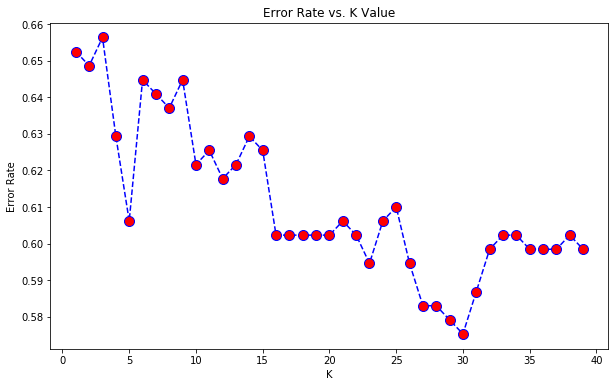

In [64]:
# Error Rate Computation

error_rate = []

# Loop through 1-40 k values that are odd for no ties to find value with highest precision
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [95]:
# NOW WITH K=7

from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [96]:
print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


                                     precision    recall  f1-score   support

                            Altbier       0.00      0.00      0.00         2
             American Adjunct Lager       0.00      0.00      0.00         2
           American Amber / Red Ale       0.14      0.22      0.17        18
         American Amber / Red Lager       0.33      0.20      0.25         5
                 American Black Ale       0.00      0.00      0.00         4
                American Blonde Ale       0.09      0.20      0.12        10
                 American Brown Ale       0.00      0.00      0.00         6
     American Double / Imperial IPA       0.75      0.79      0.77        19
                       American IPA       0.66      0.94      0.77        51
            American Pale Ale (APA)       0.50      0.69      0.58        35
                Ame

/Users/whodat_saints/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/whodat_saints/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Predicted Y')

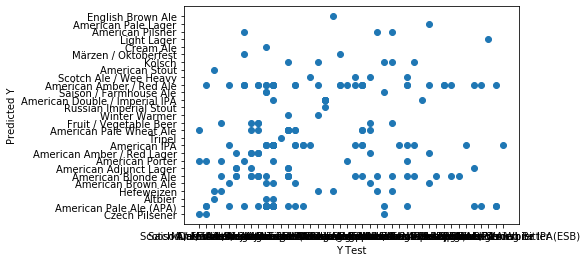

In [67]:
# Plot Test values vs Predicted values based on style

plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [99]:
# Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, 
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.40540540540540543
